## Importing necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Connect to SQLite database

In [2]:
conn = sqlite3.connect('../data/climate_data.sqlite')

# Read the data from the SQLite database
data = pd.read_sql_query("SELECT * FROM climate_data", conn)

# Close the connection
conn.close()

In [3]:
data = data.groupby(['country', 'year']).mean().reset_index()

## Checking data

In [4]:
# Display the first few rows of the dataset
print(data.head())

  country  year    co2  AverageTemperatureCelsius
0  Brazil  1901  2.103                  19.804333
1  Brazil  1902  2.506                  20.158417
2  Brazil  1903  2.440                  19.913833
3  Brazil  1904  2.620                  19.166417
4  Brazil  1905  2.799                  19.901667


In [5]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    1283 non-null   object 
 1   year                       1283 non-null   int64  
 2   co2                        1283 non-null   float64
 3   AverageTemperatureCelsius  1283 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 40.2+ KB
None


In [6]:
# Checking for missing values
print(data.isnull().sum())

country                      0
year                         0
co2                          0
AverageTemperatureCelsius    0
dtype: int64


## Data Analysis

In [7]:
# Correlation Matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                               year       co2  AverageTemperatureCelsius
year                       1.000000  0.562595                   0.297967
co2                        0.562595  1.000000                   0.149527
AverageTemperatureCelsius  0.297967  0.149527                   1.000000


### Correlation

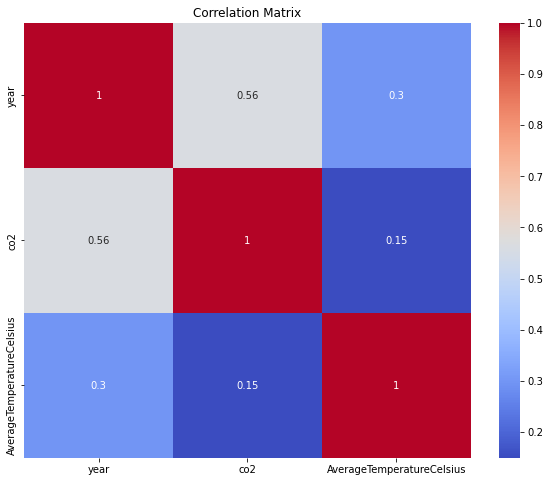

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\anikk\anaconda3\envs\work\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\anikk\anaconda3\envs\work\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


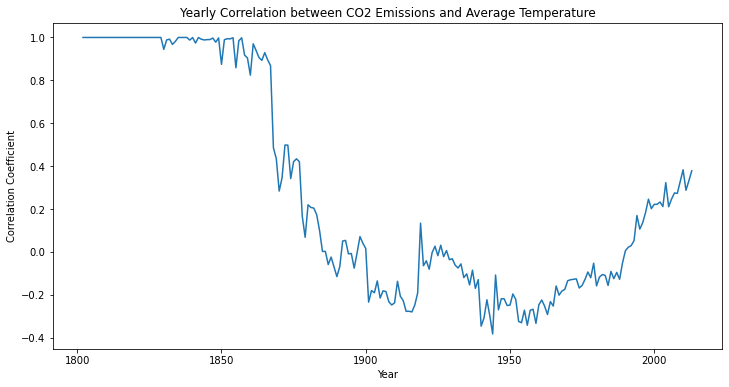

In [9]:
# Calculating and plotting the correlation over time
yearly_corr = data.groupby('year').apply(lambda x: x['co2'].corr(x['AverageTemperatureCelsius']))
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_corr.index, y=yearly_corr.values)
plt.title('Yearly Correlation between CO2 Emissions and Average Temperature')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.show()

### FacetGrid plot by countries

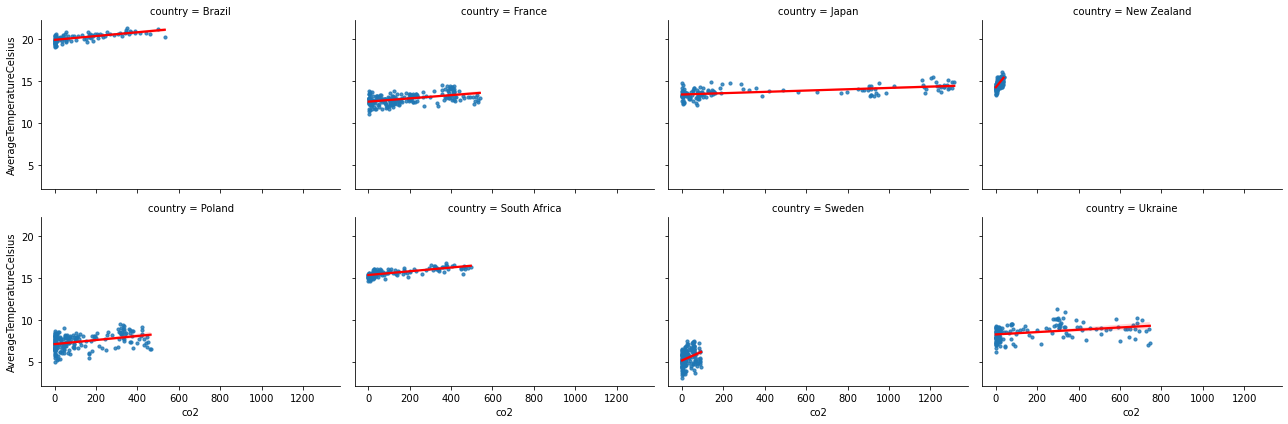

In [10]:
# FacetGrid plot
g = sns.FacetGrid(data, col="country", col_wrap=4, height=3, aspect=1.5)
g = g.map(sns.regplot, "co2", "AverageTemperatureCelsius", scatter_kws={'s':10}, line_kws={"color":"red"})
plt.show()

### Line plots

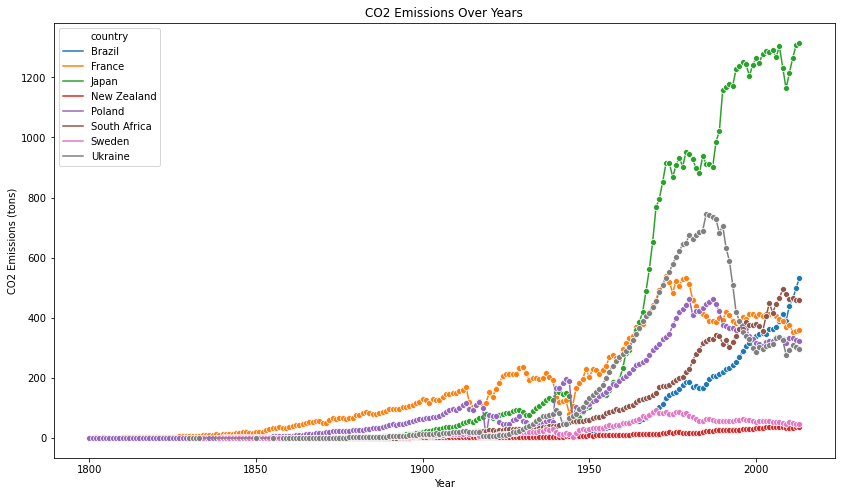

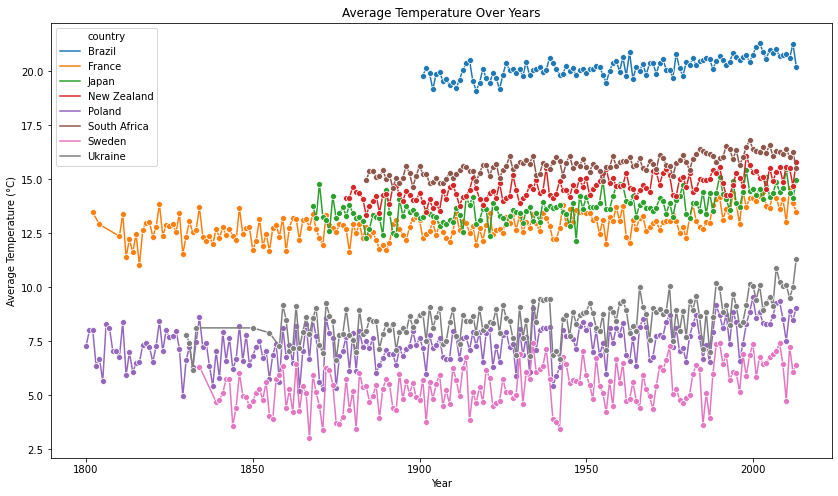

In [11]:
# Line plot for CO2 emissions and Average Temperature over the years for each country

# CO2 Emissions Over Years
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='year', y='co2', hue='country', marker='o')
plt.title('CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.show()

# Average Temperature Over Years
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='year', y='AverageTemperatureCelsius', hue='country', marker='o')
plt.title('Average Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

### FacetGrid over the years for each country

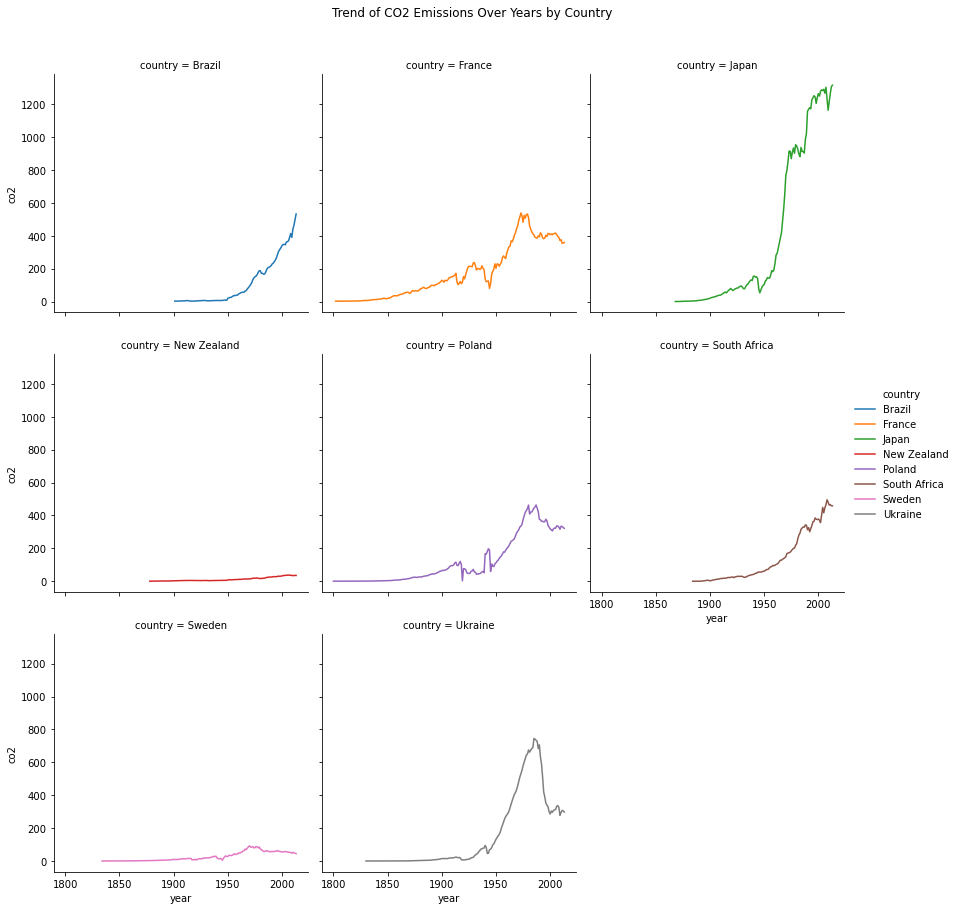

In [12]:
# Trend Analysis: FacetGrid to show trends over the years for each country

# CO2 Emissions Over Years by Country
g = sns.FacetGrid(data, col="country", hue="country", col_wrap=3, height=4)
g.map(sns.lineplot, 'year', 'co2')
g.add_legend()
g.fig.suptitle('Trend of CO2 Emissions Over Years by Country', y=1.05)
plt.show()

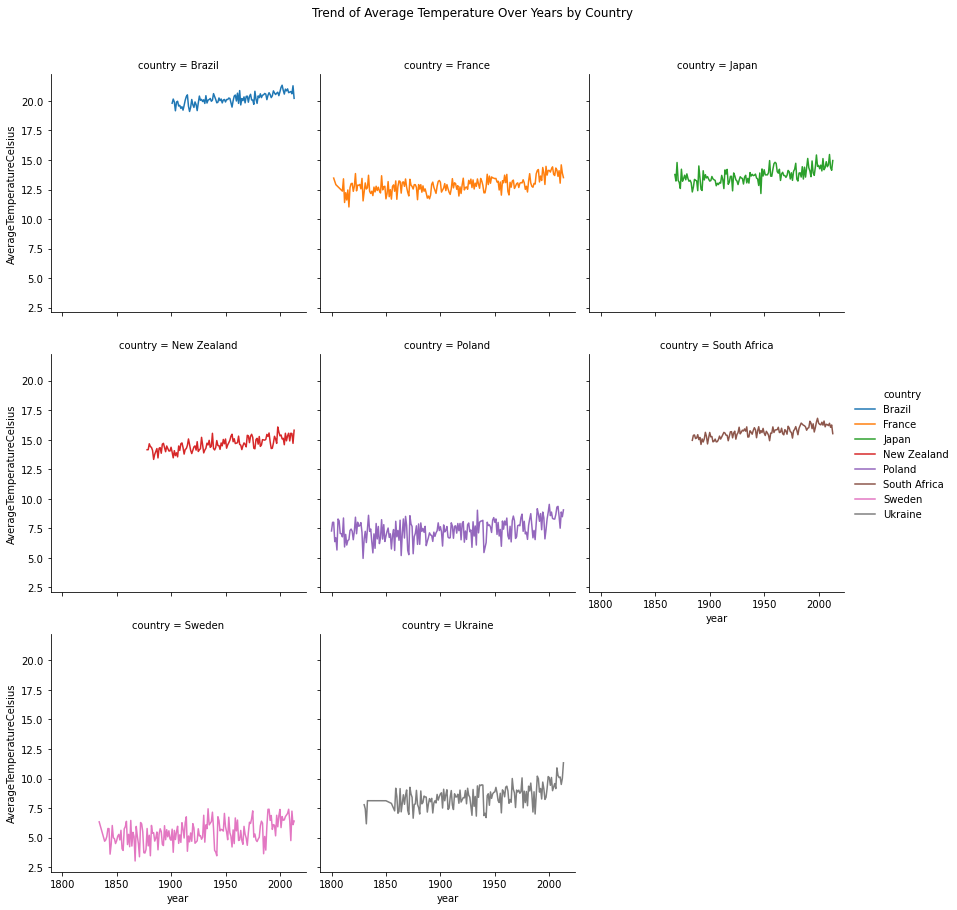

In [13]:
# Average Temperature Over Years by Country
g = sns.FacetGrid(data, col="country", hue="country", col_wrap=3, height=4)
g.map(sns.lineplot, 'year', 'AverageTemperatureCelsius')
g.add_legend()
g.fig.suptitle('Trend of Average Temperature Over Years by Country', y=1.05)
plt.show()

In [14]:
# Calculate the mean CO2 emissions and mean average temperature for each country
mean_co2 = data.groupby('country')['co2'].mean()
mean_temp = data.groupby('country')['AverageTemperatureCelsius'].mean()

print("Mean CO2 Emissions by Country:")
print(mean_co2)
print("\nMean Average Temperature by Country:")
print(mean_temp)

Mean CO2 Emissions by Country:
country
Brazil          112.593009
France          177.402869
Japan           393.537548
New Zealand      12.020066
Poland          119.675748
South Africa    137.541285
Sweden           26.674455
Ukraine         179.081494
Name: co2, dtype: float64

Mean Average Temperature by Country:
country
Brazil          20.194106
France          12.892254
Japan           13.711102
New Zealand     14.621072
Poland           7.381581
South Africa    15.663892
Sweden           5.433010
Ukraine          8.498461
Name: AverageTemperatureCelsius, dtype: float64


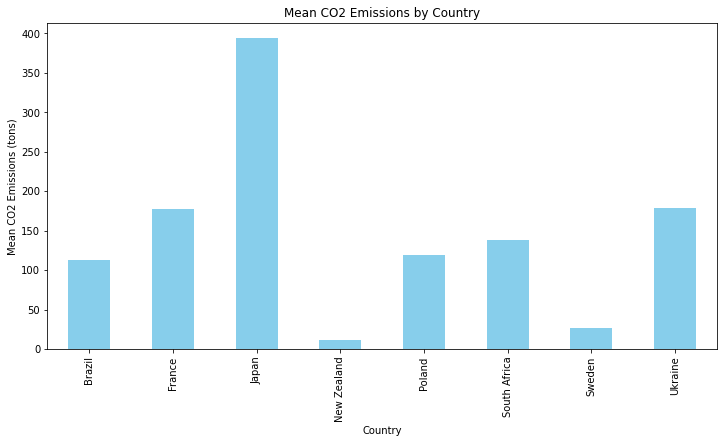

In [15]:
# Bar plot for mean CO2 emissions by country
plt.figure(figsize=(12, 6))
mean_co2.plot(kind='bar', color='skyblue')
plt.title('Mean CO2 Emissions by Country')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emissions (tons)')
plt.show()

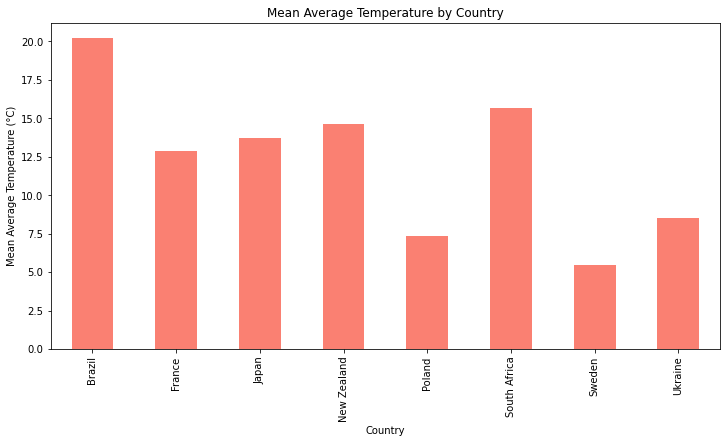

In [16]:
# Bar plot for mean average temperature by country
plt.figure(figsize=(12, 6))
mean_temp.plot(kind='bar', color='salmon')
plt.title('Mean Average Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Mean Average Temperature (°C)')
plt.show()